In [8]:
from matplotlib import pyplot as plt
import numpy as np

# density fit
# E(RCCSD) = -152.4871100519732  E_corr = -0.4246194051059911
# RCCSD(T) correction = -0.00643878984157475
# E(RCCSD) = -152.4761619072863  E_corr = -0.422890333950118
# RCCSD(T) correction = -0.00609699130237094
# the rhf energy difference is -0.009219073530942978
# the ccsd energy difference is -0.010948144686892647
# the ccsd(T) energy difference is -0.011289943226103346
rhf_en = -0.026160854776808407
ccsd_en = -0.020655769530986134
ccsd_t_en = -0.02103714707363765
fci_en = -0.021511657203706847
print()
print("density fitting with 1s orbital frozen for second row elements")
print(f"the rhf energy difference: {rhf_en:.6f}")
print(f"the ccsd energy difference {ccsd_en:6f}")
print(f"the ccsd_t energy difference {ccsd_t_en:6f}")
print(f"the fci energy difference {fci_en:6f}")
# rhf_en = [rhf_en]*100
# ccsd_en = [ccsd_en]*100
# ccsd_t_en = [ccsd_t_en]*100
# fci_en = [fci_en]*100



density fitting with 1s orbital frozen for second row elements
the rhf energy difference: -0.026161
the ccsd energy difference -0.020656
the ccsd_t energy difference -0.021037
the fci energy difference -0.021512


In [9]:
def data_analyze(rlx_data,prop_data,rhf_en=None,ccsd_en=None,ccsd_t_en=None,fci_en=None):
    rlx_en_diff = []
    rlx_en1 = []
    rlx_en2 = []
    lines = rlx_data.splitlines()
    for line in lines:
        if not line.startswith("#"): 
            columns = line.split()
            if len(columns) > 1:
                rlx_en1.append(columns[1])
            if len(columns) > 2:
                rlx_en2.append(columns[2])
            if len(columns) > 3:
                rlx_en_diff.append(columns[3])
                
    rlx_en1 = np.array(rlx_en1,dtype='float32')
    rlx_en2 = np.array(rlx_en2,dtype='float32')
    rlx_en_diff = np.array(rlx_en_diff,dtype='float32')

    prop_en1 = []
    prop_en1_err = []
    prop_en2 = []
    prop_en2_err = []
    prop_en_diff = []
    prop_en_diff_err = []
    lines = prop_data.splitlines()
    for line in lines:
        if not line.startswith("#"): 
            columns = line.split()
            if len(columns) > 1:
                prop_en1.append(columns[1])
            if len(columns) > 2:
                prop_en1_err.append(columns[2])
            if len(columns) > 3:
                prop_en2.append(columns[3])
            if len(columns) > 4:
                prop_en2_err.append(columns[4])
            if len(columns) > 5:
                prop_en_diff.append(columns[5])
            if len(columns) > 6:
                prop_en_diff_err.append(columns[6])

    prop_en1 = np.array(prop_en1,dtype='float32')
    prop_en1_err = np.array(prop_en1_err,dtype='float32')
    prop_en2 = np.array(prop_en2,dtype='float32')
    prop_en2_err = np.array(prop_en2_err,dtype='float32')
    prop_en_diff = np.array(prop_en_diff,dtype='float32')
    prop_en_diff_err = np.array(prop_en_diff_err,dtype='float32')

    rlx_steps = np.arange(len(rlx_en_diff))
    prop_steps = np.arange(len(rlx_en_diff),len(rlx_en_diff)+len(prop_en_diff))
    x_steps = np.linspace(0,max(prop_steps),100)
    
    if rhf_en is not None:
        rhf_en = [rhf_en]*100
        plt.plot(x_steps,rhf_en,label='rhf')
    if ccsd_en is not None:
        ccsd_en = [ccsd_en]*100
        plt.plot(x_steps,ccsd_en,label='ccsd')
    if ccsd_t_en is not None:
        ccsd_t_en = [ccsd_t_en]*100
        plt.plot(x_steps,ccsd_t_en,label='ccsd(t)')
    if fci_en is not None:
        fci_en = [fci_en]*100
        plt.plot(x_steps,fci_en,label='fci')
        
    plt.plot(rlx_steps,rlx_en_diff,'o',label='cs_relaxation')
    plt.errorbar(prop_steps,prop_en_diff,yerr=prop_en_diff_err, fmt='o', capsize=5,label='cs_prop')
    plt.xlabel('steps')
    plt.ylabel('energy difference')
    plt.title('correlated walkers energy differences')
    plt.legend()
    plt.show()

    plt.plot(rlx_steps,rlx_en1,'o',color='blue')
    plt.plot(rlx_steps,rlx_en2,'o',color='orange')
    plt.errorbar(prop_steps,prop_en1,yerr=prop_en1_err, fmt='o', color='blue', capsize=5,label='system 1')
    plt.errorbar(prop_steps,prop_en2,yerr=prop_en2_err, fmt='o', color='orange', capsize=5,label='system 2')
    plt.xlabel('steps')
    plt.ylabel('energy')
    plt.title('system1 and system2')
    plt.legend()
    plt.show()

    return None

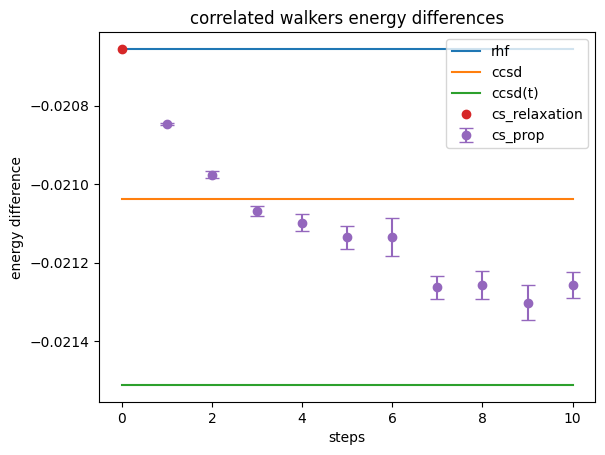

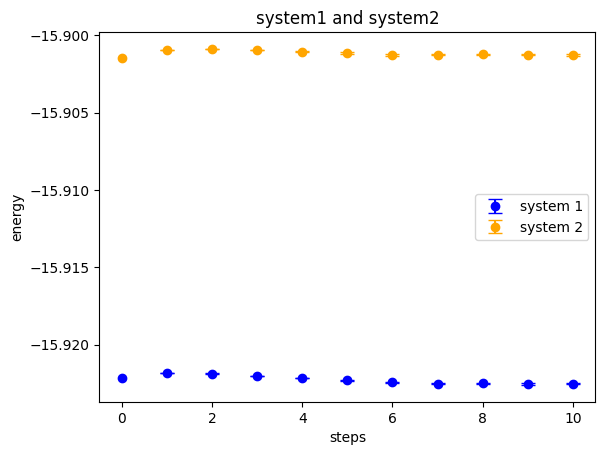

In [11]:
rlx_data = '''
# relaxation from mean-field object using 300 walkers
# rlx_step       system1_en      system2_en      en_diff
    0            -15.922150      -15.901495      -0.020656
# relaxation time: 4.80
'''

prop_data = '''
# multiple independent post relaxation propagation with step size 0.01s
# correlated sampling
# tot_walkers: 300, propagation steps: 10, number of independent runs: 100
# step   system1_en      error           system2_en      error           energy_diff     error
  1      -15.921829      0.000003        -15.900982      0.000003        -0.020847       0.000002
  2      -15.921873      0.000007        -15.900897      0.000009        -0.020976       0.000008
  3      -15.922013      0.000014        -15.900946      0.000016        -0.021068       0.000013
  4      -15.922167      0.000022        -15.901070      0.000029        -0.021098       0.000021
  5      -15.922301      0.000030        -15.901165      0.000047        -0.021136       0.000030
  6      -15.922433      0.000033        -15.901298      0.000069        -0.021135       0.000048
  7      -15.922526      0.000037        -15.901264      0.000043        -0.021263       0.000030
  8      -15.922501      0.000028        -15.901245      0.000042        -0.021257       0.000035
  9      -15.922557      0.000049        -15.901255      0.000041        -0.021302       0.000044
  10     -15.922545      0.000032        -15.901288      0.000041        -0.021257       0.000034
# total run time: 326.57
'''

data_analyze(rlx_data,prop_data,ccsd_en,ccsd_t_en,fci_en)

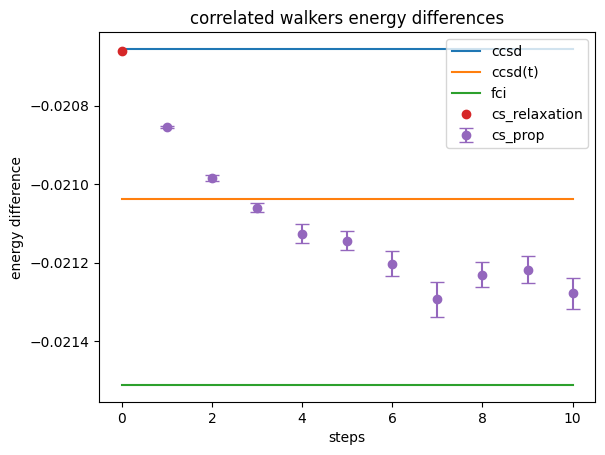

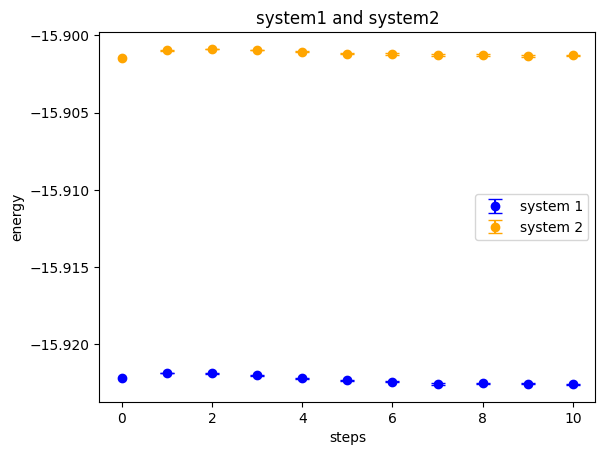

In [12]:
rlx_data = '''
# relaxation from mean-field object using 30 walkers
# rlx_step       system1_en      system2_en      en_diff
    0            -15.922153      -15.901491      -0.020662
# relaxation time: 10.47
'''

prop_data = '''
# tot_walkers: 300, propagation steps: 10, number of independent runs: 100
# step   system1_en      error           system2_en      error           energy_diff     error
  1      -15.921835      0.000003        -15.900981      0.000003        -0.020854       0.000002
  2      -15.921872      0.000008        -15.900888      0.000009        -0.020984       0.000007
  3      -15.921997      0.000016        -15.900937      0.000020        -0.021060       0.000012
  4      -15.922181      0.000026        -15.901054      0.000031        -0.021126       0.000023
  5      -15.922324      0.000030        -15.901180      0.000034        -0.021144       0.000024
  6      -15.922412      0.000030        -15.901209      0.000041        -0.021203       0.000032
  7      -15.922564      0.000052        -15.901270      0.000048        -0.021294       0.000045
  8      -15.922509      0.000033        -15.901278      0.000041        -0.021231       0.000032
  9      -15.922553      0.000035        -15.901335      0.000048        -0.021218       0.000035
  10     -15.922573      0.000039        -15.901295      0.000048        -0.021278       0.000039
# total run time: 268.46
'''

data_analyze(rlx_data,prop_data,ccsd_en=ccsd_en,ccsd_t_en=ccsd_t_en,fci_en=fci_en)

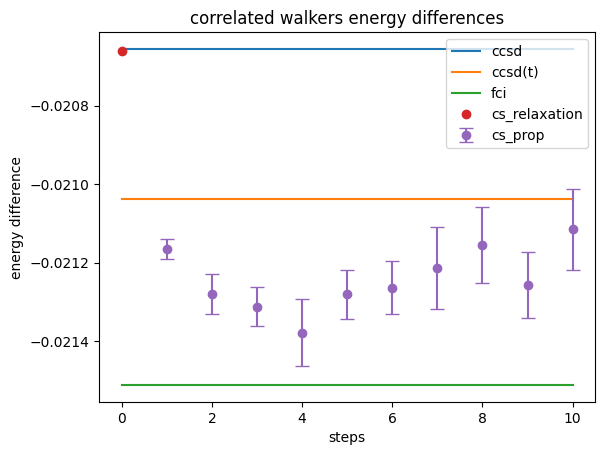

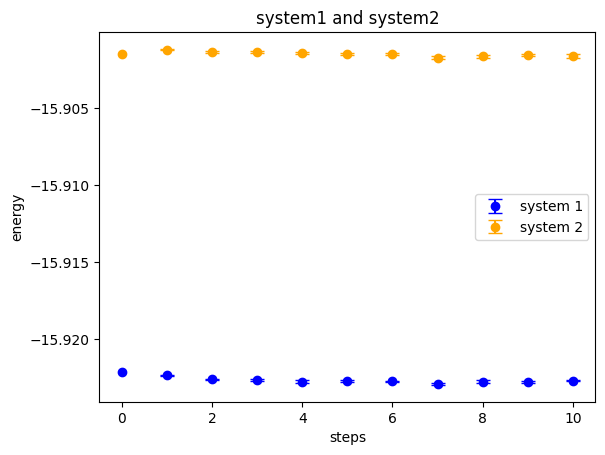

In [13]:
rlx_data = '''
# relaxation from mean-field object using 30 walkers
# rlx_step       system1_en      system2_en      en_diff
    0            -15.922153      -15.901491      -0.020662
# relaxation time: 10.47
'''

prop_data = '''
# multiple independent post relaxation propagation with step size 0.05s
# correlated sampling
# tot_walkers: 300, propagation steps: 10, number of independent runs: 100
# step   system1_en      error           system2_en      error           energy_diff     error
  1      -15.922353      0.000031        -15.901187      0.000040        -0.021166       0.000025
  2      -15.922633      0.000039        -15.901353      0.000057        -0.021280       0.000052
  3      -15.922680      0.000047        -15.901368      0.000059        -0.021312       0.000049
  4      -15.922774      0.000077        -15.901395      0.000064        -0.021379       0.000085
  5      -15.922734      0.000044        -15.901452      0.000070        -0.021281       0.000063
  6      -15.922763      0.000054        -15.901499      0.000071        -0.021264       0.000068
  7      -15.922922      0.000068        -15.901708      0.000104        -0.021214       0.000104
  8      -15.922781      0.000083        -15.901625      0.000095        -0.021156       0.000097
  9      -15.922807      0.000063        -15.901551      0.000083        -0.021257       0.000084
  10     -15.922706      0.000062        -15.901591      0.000116        -0.021115       0.000103
# total run time: 269.01
'''

data_analyze(rlx_data,prop_data,ccsd_en=ccsd_en,ccsd_t_en=ccsd_t_en,fci_en=fci_en)